<a href="https://colab.research.google.com/github/princecj65779/Final-Project-602/blob/main/Final_602_Project_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INTRODUCTION**
In this notebook I'm going to perform a classification problem on AirBnb dataset.My motivation to choose airbnb as the performing dataset was because of the properties that are varied and interesting, there are large amount of observations, and the relevance to the subject. Each row in the "Listings" dataframe represents an Airbnb listing, which includes details about the property as well as statistics about the host.

This Project's aim was to:
* *Predict the type of host (superhosts/non-superhosts) and understanding what attributes contribute to the classification of a superhost*

### **DataSet** 

The data has been taken from 4 files as listed below. The datasets have been taken from [InsideAirbnb](http://insideairbnb.com/get-the-data.html)

* Listings 
* Reviews 
* Calendar
* Neighborhood



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading Libraries**

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
! pip install missingno
import missingno as msno
import math
from os import path

# plotly imports
! pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# folium imports
! pip install folium
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

#importing models for preprocessing and splitting data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#importing packages for classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from IPython.display import Image

### **Loading Dataset**

In [ ]:
listings = pd.read_csv("/content/drive/MyDrive/lol/listings.csv")
calendar = pd.read_csv("/content/drive/MyDrive/lol/calendar.csv")
reviews = pd.read_csv("/content/drive/MyDrive/lol/reviews.csv", parse_dates=['date'])
neighborhoods = pd.read_csv("/content/drive/MyDrive/lol/neighbourhoods (1).csv")

### **Exploring Dataset**

We've three different dataframe here. Let's understand what they contain.

#### ***Listings DataFrame***


In [ ]:
listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11464,https://www.airbnb.com/rooms/11464,20211024155027,2021-10-24,Deluxe Studio 5 min. to SC Kaiser & Apple Park,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,https://a0.muscache.com/pictures/121321/2c5a5a...,42458,https://www.airbnb.com/users/show/42458,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,95%,f,https://a0.muscache.com/im/users/42458/profile...,https://a0.muscache.com/im/users/42458/profile...,Santa Clara,15,15,"['email', 'phone', 'reviews']",t,f,"Santa Clara, California, United States",Santa Clara,NaN,37.34415,-121.98701,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,0.0,"[""Stove"", ""Cooking basics"", ""Dedicated workspa...",$85.00,4,365,4,4,1125,1125,4.0,1125.0,NaN,t,18,48,78,168,2021-10-24,11,5,1,2018-08-26,2021-10-13,4.55,5.0,4.82,4.91,4.82,4.82,4.73,NaN,t,14,14,0,0,0.29


In [ ]:
print(listings.shape)
print(len(listings.id.unique()))

(5092, 74)
5092


***There are 5092 unique observations (listing ids) and 74 features.***

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5092 entries, 0 to 5091
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5092 non-null   int64  
 1   listing_url                                   5092 non-null   object 
 2   scrape_id                                     5092 non-null   int64  
 3   last_scraped                                  5092 non-null   object 
 4   name                                          5091 non-null   object 
 5   description                                   4923 non-null   object 
 6   neighborhood_overview                         3093 non-null   object 
 7   picture_url                                   5092 non-null   object 
 8   host_id                                       5092 non-null   int64  
 9   host_url                                      5092 non-null   o

#### ***Calendar DataFrame***


**Here is a glimpse of the calendar dataframe.**

In [ ]:
calendar.head(2)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1148601,2021-10-24,f,$50.00,$50.00,30.0,1125.0
1,1148601,2021-10-25,f,$50.00,$50.00,30.0,1125.0


In [ ]:
calendar.shape

(1858593, 7)

**There are 1858593 observations and 7 features**


**Here is an overview of the dataframe.**

In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858593 entries, 0 to 1858592
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 99.3+ MB


#### **Numeric columns information**

In [ ]:
calendar[['minimum_nights','maximum_nights']].describe()
#Price would be converted into numeric later in the EDA

,minimum_nights,maximum_nights
count,1.858592e+06,1.858592e+06
mean,3.803295e+01,7.575885e+06
std,1.374690e+02,1.273180e+08
min,1.000000e+00,1.000000e+00
25%,1.000000e+00,3.650000e+02
50%,3.000000e+00,1.125000e+03
75%,2.800000e+01,1.125000e+03
max,7.300000e+02,2.147484e+09


#### ***Reviews DataFrame***


In [ ]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11464,14231760,2014-06-15,12818243,Robert,Emey was very attentive and went above and bey...
1,11464,23860917,2014-12-13,20961228,Karen,Check-in was easy and the room was generally a...


In [ ]:
print(reviews.shape)
print(len(reviews.id.unique()))

(163354, 6)
163354


**There are 163354 unique observations (comments) and 6 features**

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163354 entries, 0 to 163353
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     163354 non-null  int64         
 1   id             163354 non-null  int64         
 2   date           163354 non-null  datetime64[ns]
 3   reviewer_id    163354 non-null  int64         
 4   reviewer_name  163353 non-null  object        
 5   comments       163182 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 7.5+ MB


#### ***Neighborhoods DataFrame***


In [ ]:
neighborhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Campbell
1,NaN,Cupertino
2,NaN,Gilroy
3,NaN,Los Altos
4,NaN,Los Altos Hills


In [ ]:
print(neighborhoods.shape)
print(len(neighborhoods.neighbourhood.unique()))

(16, 2)
16


**There are 16 unique observations (neighborhoods) and 2 features.**

In [ ]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        16 non-null     object 
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


**Summary statistics for the Neighborhoods dataframe:**

In [ ]:
neighborhoods.describe()

,neighbourhood_group
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


### **Cleaning the Dataset**

**Listings Dataset**

After evaluating the Listings dataframe, we'll look for probable missing values and outliers. We'll also double-check that each column's data is of the correct datatype and format, and that it's ready to use in the rest of the EDA phase.

In [ ]:
nullval = listings.isnull().sum()
nullval[nullval > 0].sort_values(ascending=False)

neighbourhood_group_cleansed    5092
bathrooms                       5092
calendar_updated                5092
license                         5063
neighbourhood                   1999
neighborhood_overview           1999
host_about                      1786
review_scores_value             1162
review_scores_location          1162
review_scores_communication     1162
review_scores_checkin           1162
review_scores_cleanliness       1162
review_scores_accuracy          1162
reviews_per_month               1139
first_review                    1139
last_review                     1139
review_scores_rating            1139
host_response_time              1003
host_response_rate              1003
host_acceptance_rate             936
host_neighbourhood               818
bedrooms                         344
beds                             177
description                      169
bathrooms_text                     9
host_location                      8
name                               1
d

**How many missing values are there in each column?**

There are three empty columns -- "bathrooms", "calendar_updated", and "license".

**Changing the data type of price column**

In [ ]:
listings['price'] = listings['price'].astype('string') #converting to string
listings['price'] = listings['price'].str.replace('$','') #removing $
listings['price'] = listings['price'].str.replace(',','') #removing ,
listings['price'] = listings['price'].astype('float') #changing the dtype to float
listings['price']

0        85.0
1        80.0
2        48.0
3       120.0
4        50.0
        ...  
5087     30.0
5088     30.0
5089     30.0
5090     31.0
5091    102.0
Name: price, Length: 5092, dtype: float64


**There is 1 observation (listings) where the price is $0.**

In [ ]:
# Identifying rows with price of the listing as $0
listings[listings['price'] == 0]['price'].count()

1

In [ ]:
drop_df = listings[(listings['beds'] == 0) | (listings['price'] == 0) | (listings['accommodates'] == 0)].index
listings.drop(drop_df, inplace=True)

After finding that the median number of beds and bedrooms is 1, we have filled the missing values for both these columns with 1.

In [ ]:
listings['beds'].median()

1.0

In [ ]:
listings['bedrooms'].median()

1.0

In [ ]:
listings.beds = listings.beds.fillna(1)

In [ ]:
listings.bedrooms = listings.bedrooms.fillna(1)

We will also remove observations with missing values in any of these columns.

In [ ]:
listings.dropna(subset=['first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month'], thresh=10, inplace=True)

Lastly, we decide to drop the columns that are not significant to EDA and furthur analysis.

In [ ]:
listings.drop(['scrape_id', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'bathrooms','calendar_updated','license', 'host_total_listings_count', 'calendar_last_scraped'], axis=1, inplace=True)

In [ ]:
listings.shape

(3825, 60)

After cleaning the Listings dataframe, we now have 3825 unique observations (listings) and 62 features.

### Looking into Host-Related Data

**Are there any missing values within host-related data?**

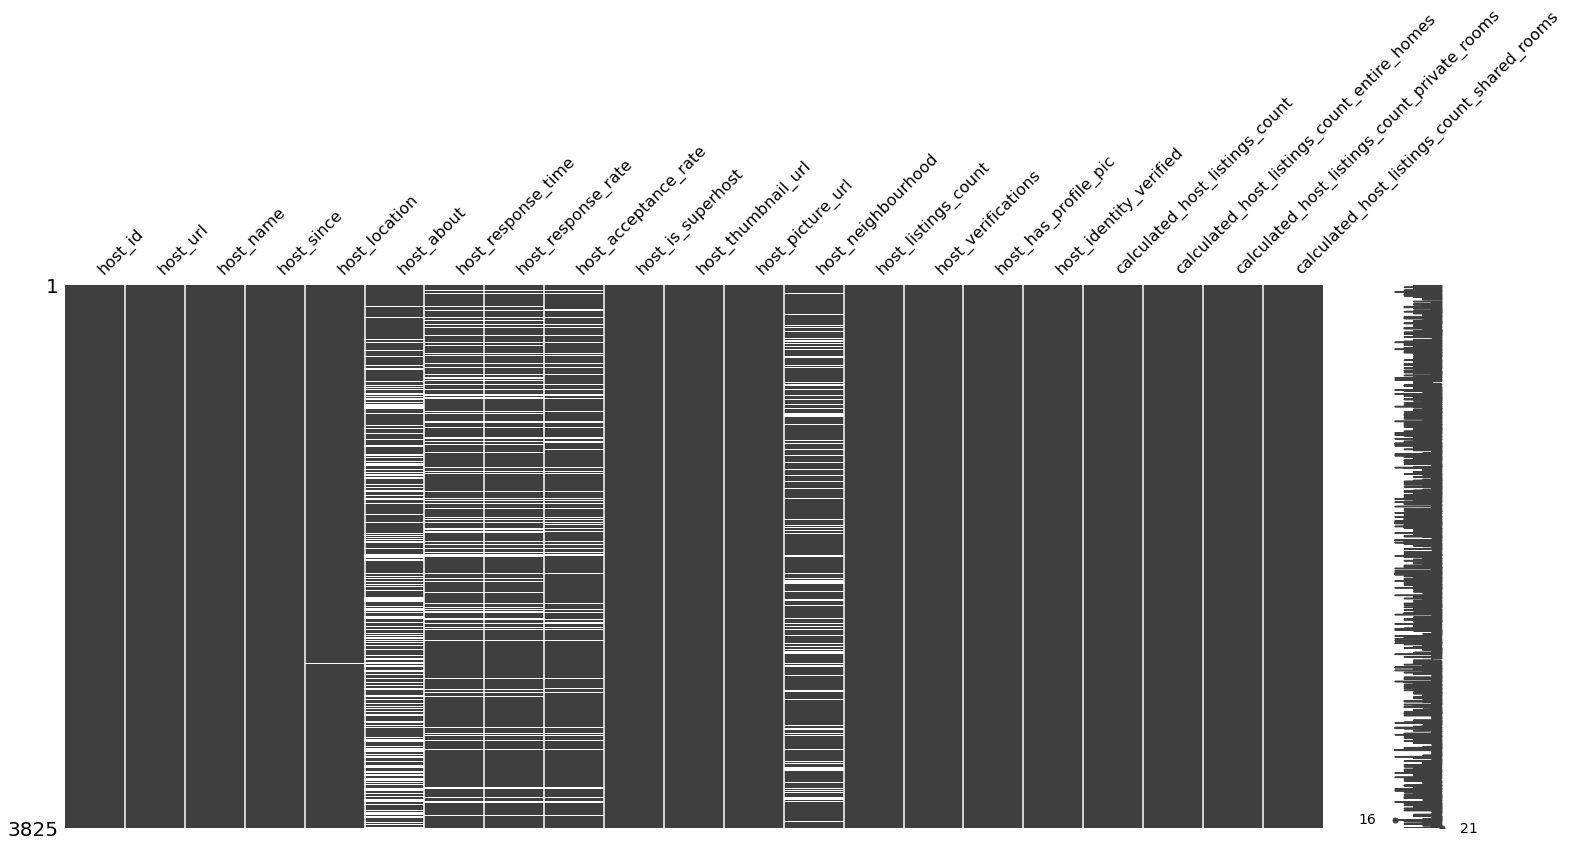

In [ ]:
msno.matrix(listings[['host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']])

**Converting columns to the correct data type.**

In [ ]:
listings.calculated_host_listings_count_shared_rooms = listings.calculated_host_listings_count_shared_rooms.astype('float')
listings.calculated_host_listings_count_private_rooms = listings.calculated_host_listings_count_private_rooms.astype('float')
listings.calculated_host_listings_count_entire_homes = listings.calculated_host_listings_count_entire_homes.astype('float')
listings.calculated_host_listings_count = listings.calculated_host_listings_count.astype('float')

After adding up the count of all room types, the total does not exceed the calculated_host_listings_count.

In [ ]:
check_condition = (listings['calculated_host_listings_count_private_rooms'] + listings['calculated_host_listings_count_entire_homes'] + listings['calculated_host_listings_count_shared_rooms']) > listings['calculated_host_listings_count']
listings[check_condition]

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


**Examine the distribution of the host acceptance rate.**

In [ ]:
listings['host_acceptance_rate'].value_counts().head()

100%    914
97%     318
99%     246
98%     234
96%     177
Name: host_acceptance_rate, dtype: int64

**Converting columns to the correct format and data type.**

In [ ]:
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].astype("string")
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace('%','')
listings['host_acceptance_rate'] = pd.to_numeric(listings['host_acceptance_rate'], errors='coerce')
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].apply(lambda x: x/100 if isinstance(x, float) else None)

**How many null values are there?**

There are 591 null values in host_acceptance_rate because Airbnb did not report this for sellers with less reviews and data. We're not imputing the null values at this point because we won't be using this feature for our models.

In [ ]:
listings['host_acceptance_rate'].isnull().sum()

591

**Examine the distribution of the host reponse rate.**

In [ ]:
listings['host_response_rate'].value_counts().head()

100%    2498
90%       73
97%       72
98%       72
99%       66
Name: host_response_rate, dtype: int64

**Converting the columns to the correct format and data types.**

In [ ]:
listings['host_response_rate'] = listings['host_response_rate'].astype("string")
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%','')
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'], errors='coerce')
listings['host_response_rate'] = listings['host_response_rate'].apply(lambda x: x/100 if isinstance(x, float) else None)
listings['host_response_time'] = listings['host_response_time'].astype('string')
listings['host_is_superhost'] = listings['host_is_superhost'].astype('string')

**Examine the distribution of host_response_time.**

In [ ]:
listings['host_response_time'].value_counts().reset_index()

,index,host_response_time
0,within an hour,2433
1,within a few hours,396
2,within a day,234
3,a few days or more,82


**What is the average response rate for each response time category?**

Hosts who response within an hour have a 99.18% response rate on average.

In [ ]:
listings.groupby('host_response_time')['host_response_rate'].mean()

host_response_time
a few days or more    0.070854
within a day          0.835256
within a few hours    0.969470
within an hour        0.991866
Name: host_response_rate, dtype: float64

**What is the relationship between response rate and response time?**

Below is a visualization of the relationship between them. We found that hosts who usually reponse within an hour have the highest response rate on average, while hosts who tend to response after a few days or more have the lowest response rate.

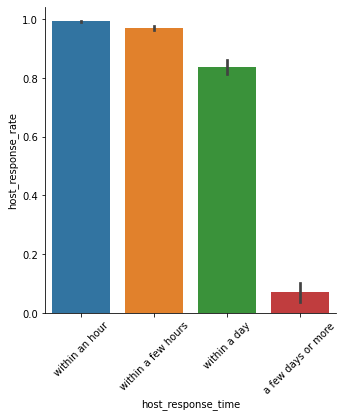

In [ ]:
sns.catplot(x='host_response_time', y='host_response_rate', data=listings, kind='bar', order=['within an hour', 'within a few hours', 'within a day', 'a few days or more'])
plt.xticks(rotation =45)
plt.show();

**Is there is a relationship between acceptance rate and response rate?**

Below is a visualization of host acceptance rate and response rate and there doesn't seem to be an obvious relationship. It is possible that a popular host only respond to messages sent by the few guests he/she accepts and not responding to those he/she does not want to accept, or that a host is constantly declining requests via messages.

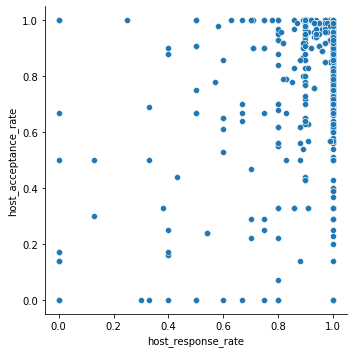

In [ ]:
sns.relplot(x='host_response_rate', y='host_acceptance_rate', data=listings, kind='scatter')
plt.show();

**Encoding "host_is_superhost" and "host_identity_verified" values "T" and "F" to 1 and 0 respectively and creating separate column for binary variables.**

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3825 entries, 1 to 5032
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3825 non-null   int64  
 1   listing_url                                   3825 non-null   object 
 2   last_scraped                                  3825 non-null   object 
 3   name                                          3825 non-null   object 
 4   description                                   3752 non-null   object 
 5   neighborhood_overview                         2557 non-null   object 
 6   picture_url                                   3825 non-null   object 
 7   host_id                                       3825 non-null   int64  
 8   host_url                                      3825 non-null   object 
 9   host_name                                     3825 non-null   o

In [ ]:
index = {'t' : 1, 'f' : 0} 
listings['is_superhost_numeric'] = listings['host_is_superhost']
listings = listings.replace({"is_superhost_numeric": index})

listings['host_identity_verified'] = listings['host_identity_verified'].astype('string')
listings['host_identity_verified_numeric'] = listings['host_identity_verified']
listings = listings.replace({"host_identity_verified_numeric": index}) 

**Converting host_since, first_review, last_review and last_scraped to datetime.**

In [ ]:
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['last_review'] = pd.to_datetime(listings['last_review'])
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])

We examined the listings dataframe and found that the listing_id is unique (each row represents a unique listing), but host_id is repeated when one host has multiple listings. In order to specifically analyze host data and avoid repeated datapoints, we will remove duplicate host id's.

In [ ]:
listings[listings['host_id'] == 2787]

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,is_superhost_numeric,host_identity_verified_numeric


**Creating a new dataframe called "hosts" to store host information.**

In [ ]:
col_name = ['host_id']
hosts = listings.sort_values('host_id').drop_duplicates(subset=col_name)

We now create a new calculated column so that we can determine the average price of properties per host.

In [ ]:
average_price_per_host = listings.groupby('host_id')['price'].mean()
average_price_per_host_df = pd.DataFrame(average_price_per_host)
average_price_per_host_df = average_price_per_host_df.reset_index()
average_price_per_host_df = average_price_per_host_df.rename(columns={"price": "average_host_price"})
average_price_per_host_df.head()

,host_id,average_host_price
0,7054,90.0
1,19109,175.0
2,19333,150.0
3,39547,38.0
4,42458,131.0


And join this dataframe with "hosts" on host_id so that there are averages for each host in the "hosts" dataframe. We now have 25038 unique observations (hosts) in the "hosts" dataframe.

In [ ]:
hosts = hosts.merge(average_price_per_host_df, on='host_id')
len(hosts.id.unique())

1891

**What is a superhost?**

A superhost is someone who provides exceptional service. 

**How many superhosts are there?**

There are 901 superhosts and 900 non-superhosts.

In [ ]:
hosts['is_superhost_numeric'].value_counts()

0    990
1    901
Name: is_superhost_numeric, dtype: int64

In [ ]:
901/1891

0.476467477525119

About 47.64% of all the hosts are superhosts.

**How many hosts completed identity verification?**

1516 hosts have verified their identification and 375 hosts have not.

In [ ]:
hosts['host_identity_verified_numeric'].value_counts()

1    1516
0     375
Name: host_identity_verified_numeric, dtype: int64

**Creating two new dataframes, segmenting superhosts and non-superhosts.**

In [ ]:
is_super_df = hosts[hosts.is_superhost_numeric == 1.0]
not_super_df = hosts[hosts.is_superhost_numeric == 0.0]

## Reviews DataFrame

In [ ]:
# Drop any missing comment or any comment that has less than 3 characters
reviews.dropna(subset=['comments'], inplace=True)
reviews = reviews.loc[reviews['comments'].str.len()>3]

In [ ]:
len(reviews['listing_id'].unique())

3949

In [ ]:
# Create two columns that indicate the year and month where a comment was posted
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month
reviews.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,11464,14231760,2014-06-15,12818243,Robert,Emey was very attentive and went above and bey...,2014,6


# Exploratoy Data Analysis

### Listings DataFrame

Visualizing the distribution of features in the listings dataframe. The latitude is normally distributed while the others appear to be skewed.

In [ ]:
# Visualizing the distribution for every "feature"
df_new = listings[[
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable']]

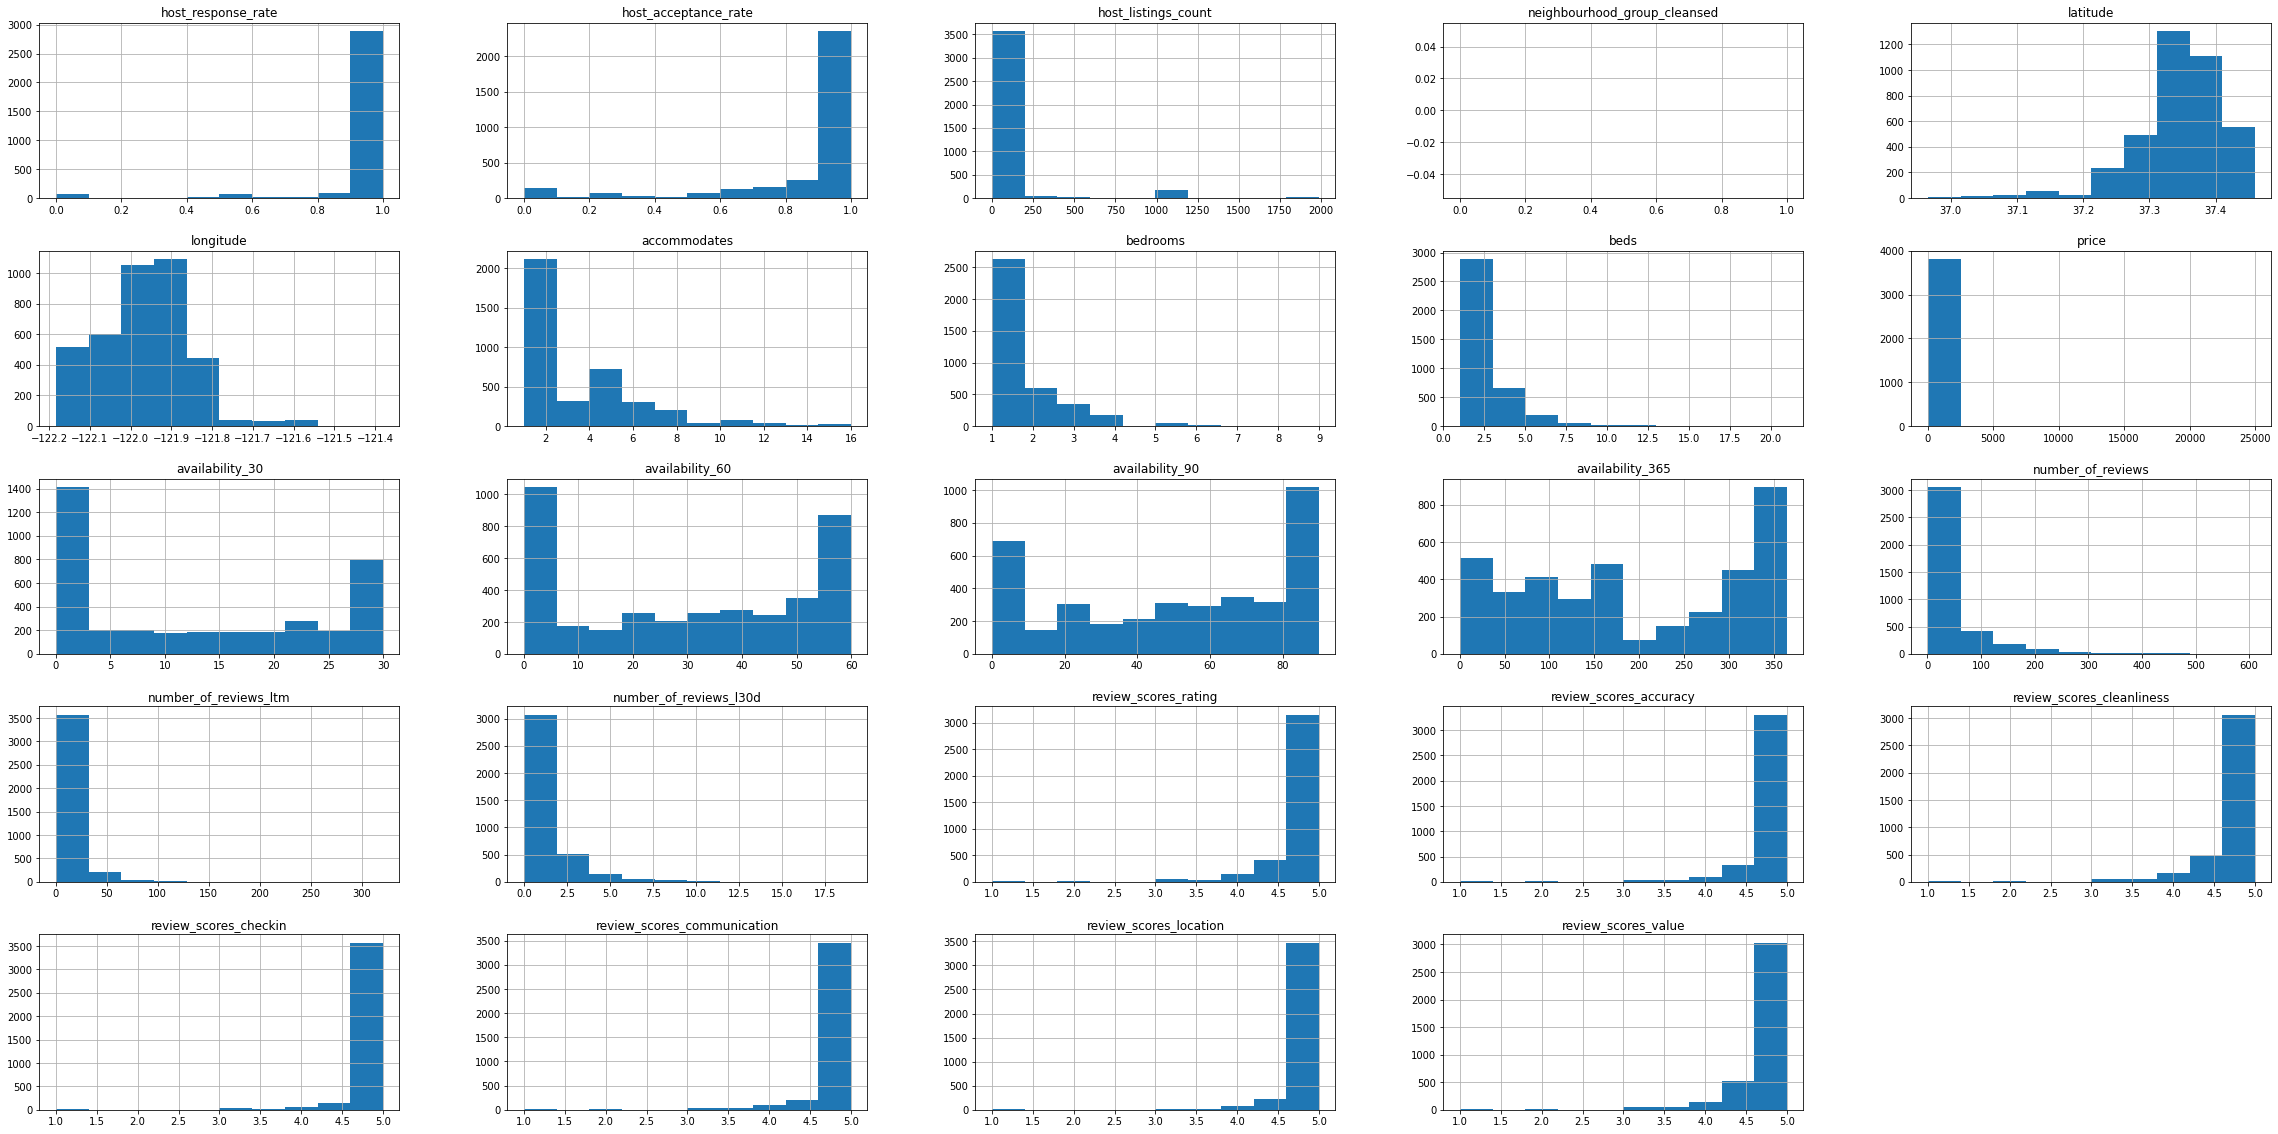

In [ ]:
df_new.hist( linewidth=1, figsize=(40, 20));

In [ ]:
# Create two dataframes that break down the listing data by super host
superhost_listings = listings[listings.host_is_superhost == 't']
not_superhost_listings = listings[listings.host_is_superhost == 'f']

 **What is the distribution of prices for hosts and superhosts?**

On average, prices are lower for superhosts. However, I can see that there are a number of outliers, including some listings that are asking $10,000.

For these reasons, I'll look at listings that are less than $1000 so that the visualizations are not highly skewed.

In [ ]:
len(listings[listings.price > 1000]) / len(listings)

0.006535947712418301

In [ ]:
# Analyze the distribution of average listing price by super host
no_na_listings = listings.dropna(subset= ['is_superhost_numeric'])
viz2 = px.strip(no_na_listings, y='price', x='is_superhost_numeric')
viz2.show()


**What is the distribution of room types in the dataset?**

The most prolific room type is an entire home/apartment, and the least prolific appears to be the shared room.

A similar trend can be observed for both graphs where both superhosts and non-superhosts have more number of listings that are entire homes and private rooms, as compared to shared rooms and hotel rooms (close to 0 for both superhosts and non-superhosts).

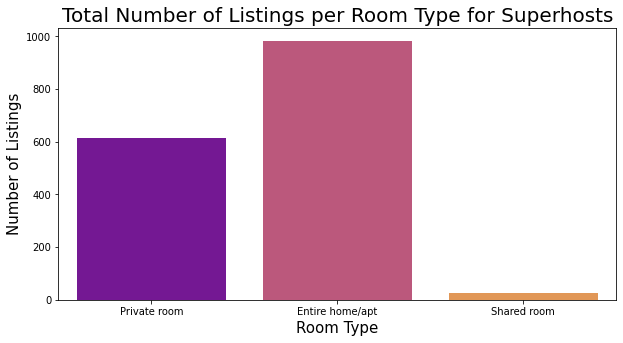

In [ ]:
superhost_df = listings[listings.host_is_superhost == 't']
sns.countplot(data = superhost_df, x = 'room_type', palette="plasma")
viz4 = plt.gcf()
viz4.set_size_inches(10, 5)

plt.title('Total Number of Listings per Room Type for Superhosts',fontsize = 20)
plt.xlabel('Room Type',fontsize = 15)
plt.ylabel('Number of Listings',fontsize = 15)
plt.tick_params(labelsize=10)
plt.show();

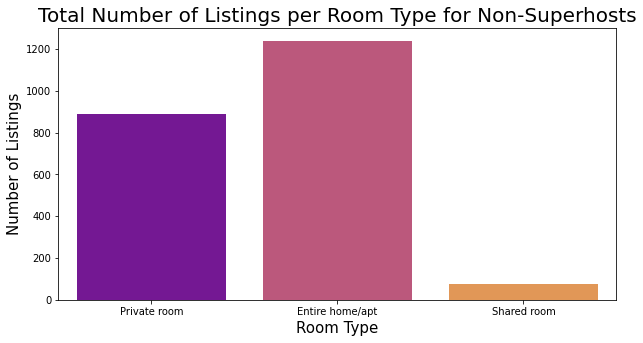

In [ ]:
not_superhost_df = listings[listings.host_is_superhost == 'f']
sns.countplot(data = not_superhost_df, x = 'room_type', palette="plasma")
viz5 = plt.gcf()
viz5.set_size_inches(10,5)

plt.title('Total Number of Listings per Room Type for Non-Superhosts',fontsize = 20)
plt.xlabel('Room Type',fontsize = 15)
plt.ylabel('Number of Listings',fontsize = 15)
plt.tick_params(labelsize=10)
plt.show()

#### **Expensive neighborhoods**

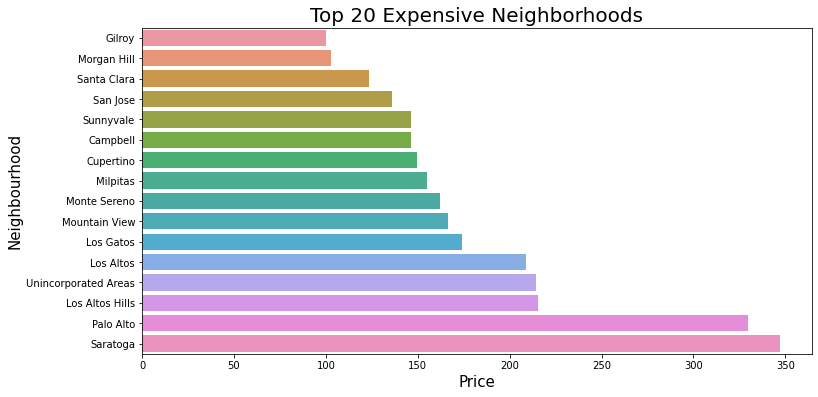

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Top 20 Expensive Neighborhoods",fontsize = 20)
sns.barplot(y="neighbourhood_cleansed", x="price",data= listings.groupby('neighbourhood_cleansed').agg({'price': 'mean'}).sort_values('price').reset_index().tail(20))
plt.ioff()
plt.xlabel('Price',fontsize=15)
plt.ylabel("Neighbourhood",fontsize=15)
plt.tick_params(labelsize=10)
data = listings.neighbourhood.value_counts()[:10]
plt.show();

In [ ]:
# Remove values in availability columns equal to 0 such that it doesn't get displayed in visualizations
hosts_availability = hosts[(hosts['availability_30'] != 0) & (hosts['availability_60'] != 0) & (hosts['availability_90'] != 0) & (hosts['availability_365'] != 0)]

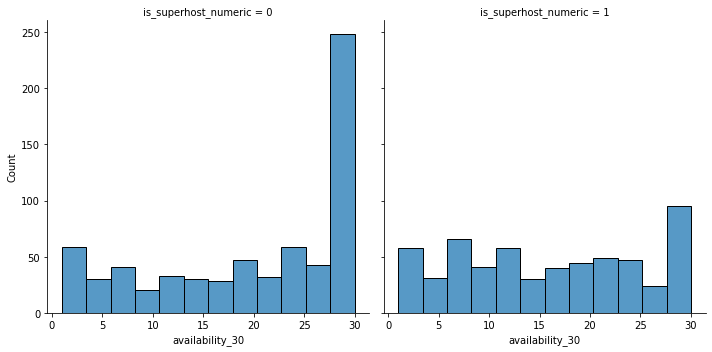

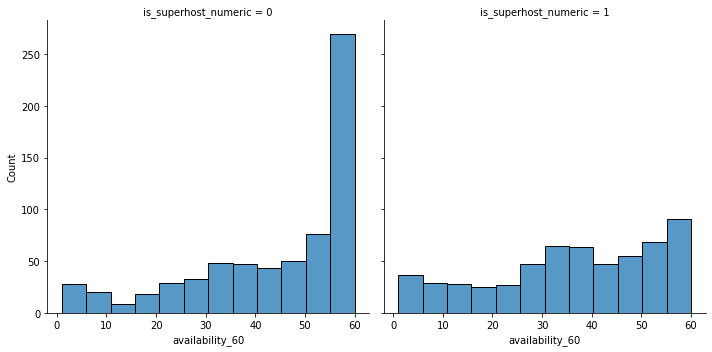

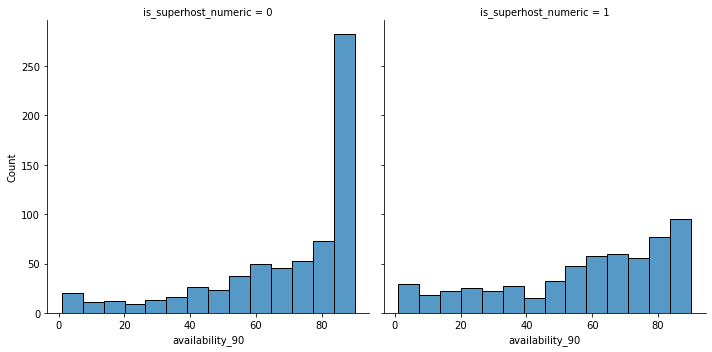

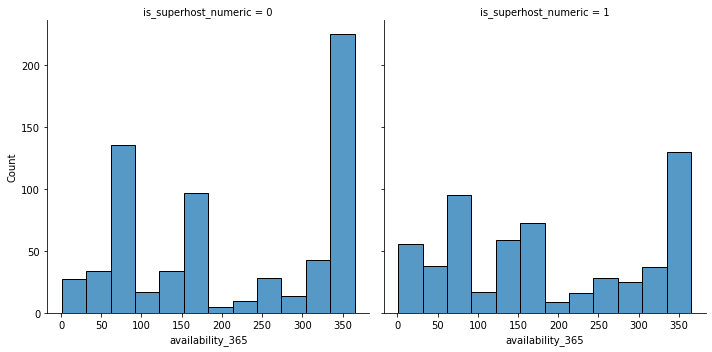

In [ ]:
sns.displot(hosts_availability, x="availability_30", col="is_superhost_numeric", multiple="dodge")
sns.displot(hosts_availability, x="availability_60", col="is_superhost_numeric", multiple="dodge")
sns.displot(hosts_availability, x="availability_90", col="is_superhost_numeric", multiple="dodge")
sns.displot(hosts_availability, x="availability_365", col="is_superhost_numeric", multiple="dodge")


The general trend observed across listings available across a span of 30, 60, 90 and 365 days is that more number of non-superhosts have their listings available for 30, 60, 90 and 360 days as compared to that of superhosts. We can also observe that superhosts generally don't keep their listings available for too long in the market.

### **Host Data Analysis**

**How do the number of hosts on Airbnb change from 2009 to 2020?**

One of the features in the data is a date indicating when a host joined Airbnb. Below I create a new dataframe that calculates the cumualative number of hosts on Airbnb. These values are graphed on the line chart below to show how the number of hosts changes over time. 

Every observation in our dataset has a recent date indicating when it was last scraped from the site. This means that all of the data in the graph below is from listings that were recently found to be active on Airbnb.

In [ ]:
is_super_df = hosts[hosts.is_superhost_numeric == 1.0]
not_super_df = hosts[hosts.is_superhost_numeric == 0.0]

In [ ]:
len(is_super_df)

901

In [ ]:
# Create a dataframe with a column for the cumulative number of hosts over time
num_host_by_date = hosts.groupby('host_since')[['host_id']].count().reset_index().rename(columns={'host_id': 'host_since_count'})
num_host_by_date['host_count_cum'] = num_host_by_date['host_since_count'].cumsum()
num_host_by_date.head()

,host_since,host_since_count,host_count_cum
0,2009-01-24,1,1
1,2009-05-28,1,2
2,2009-05-29,1,3
3,2009-09-18,1,4
4,2009-09-30,1,5


In [ ]:
# Create a dataframe with the number of hosts for each year
resample_by_year = num_host_by_date.set_index('host_since').resample('Y').sum()
resample_by_year['year_cum'] = resample_by_year['host_since_count'].cumsum()
resample_by_year = resample_by_year[['year_cum']].reset_index()

resample_by_year.head()

,host_since,year_cum
0,2009-12-31,6
1,2010-12-31,24
2,2011-12-31,87
3,2012-12-31,185
4,2013-12-31,342


In [ ]:
# Display the number of total hosts over time
viz6 = go.Figure(data=go.Scatter(x=resample_by_year['host_since'], y=resample_by_year['year_cum']))

viz6.update_layout(title='Number of Hosts on Airbnb By Year',
                   xaxis_title='Year',
                   yaxis_title='Number of Hosts')

viz6.show()

In [ ]:
# Create a dataframe with the cumulative number of super hosts by date
num_super_host_by_date = is_super_df.groupby('host_since')[['host_id']].count().reset_index().rename(columns={'host_id': 'host_since_count'})
num_super_host_by_date['host_count_cum'] = num_super_host_by_date['host_since_count'].cumsum()

# Resample by year
super_host_resample_by_year = num_super_host_by_date.set_index('host_since').resample('Y').sum()
super_host_resample_by_year['year_cum'] = super_host_resample_by_year['host_since_count'].cumsum()
super_host_resample_by_year = super_host_resample_by_year[['year_cum']].reset_index()

super_host_resample_by_year.head()

,host_since,year_cum
0,2009-12-31,3
1,2010-12-31,13
2,2011-12-31,43
3,2012-12-31,87
4,2013-12-31,161


In [ ]:
# Create a dataframe with the cumulative number of non super hosts by date
not_super_host_by_date = not_super_df.groupby('host_since')[['host_id']].count().reset_index().rename(columns={'host_id': 'host_since_count'})
not_super_host_by_date['host_count_cum'] = not_super_host_by_date['host_since_count'].cumsum()

# Resample by year
not_super_host_resample_by_year = not_super_host_by_date.set_index('host_since').resample('Y').sum()
not_super_host_resample_by_year['year_cum'] = not_super_host_resample_by_year['host_since_count'].cumsum()
not_super_host_resample_by_year = not_super_host_resample_by_year[['year_cum']].reset_index()

not_super_host_resample_by_year.head()

,host_since,year_cum
0,2009-12-31,3
1,2010-12-31,11
2,2011-12-31,44
3,2012-12-31,98
4,2013-12-31,181


**How do the number of superhosts vs non superhosts on Airbnb change from 2009 to 2022?**


In [ ]:
# Create a combined bar graph of the number of superhosts and non superhosts by year
dates = super_host_resample_by_year['host_since']

viz7 = go.Figure(data=[
    go.Bar(name='Total number of hosts', x=dates, y=resample_by_year['year_cum']),
    go.Bar(name='Superhosts', x=dates, y=super_host_resample_by_year['year_cum']),
    go.Bar(name='Not Superhosts', x=dates, y=not_super_host_resample_by_year['year_cum'])
])

# Change the bar mode
viz7.update_layout(barmode='group')

viz7.update_layout(title='Number of Hosts on Airbnb By The Last Day of Each Year',
                   xaxis_title='Year',
                   yaxis_title='Number of Hosts')

viz7.show()


We can see a pretty steady increase across all of the years, and then a slow leveling off towards the end of the range.

**What is the percentage of confirmed vs. unverified hosts?**

The majority of Airbnb hosts are verified, as can be shown. Identity verification entails a host sharing a photo of their ID to prove that they are who they claim to be. As we can see, the majority of Airbnb hosts have this extra security option.

In [ ]:
# find the count of hosts that have their identity verified
identity_verified = hosts['host_identity_verified_numeric'].value_counts()
identity_verified_df = pd.DataFrame(identity_verified).reset_index().rename(columns={'index':'verified','host_identity_verified_numeric':'host_count'})
labels = ['Verified', 'Not Verified']

In [ ]:
viz8 = go.Figure([go.Bar(x=labels, y=identity_verified_df['host_count'])])

viz8.update_layout(title='Count of Hosts With Identity Verified', yaxis_title='Count of Hosts')

viz8.write_html('identity_verified_count_plot.html')

viz8.show()


## Reviews Analysis

**When was the oldest comment posted and when was the latest posted?**  
The oldest comment was posted on May 28, 2010 and the latest was posted on October 24, 2021

In [ ]:
print(reviews.date.min())
print(reviews.date.max())

2010-05-28 00:00:00
2021-10-24 00:00:00


**How many reviews were there in each year?**  
We see the number of comments posted increased over time and 2019 has the most comments posted. After COVID outbreak, the number of comments posted dropped. The decrease can be resulted for the travel restrictions that were imposed.

In [ ]:
reviews.groupby('year')['comments'].count()

year
2010        9
2011      122
2012      346
2013      805
2014     2307
2015     5246
2016    10797
2017    17735
2018    29878
2019    41080
2020    23409
2021    30969
Name: comments, dtype: int64

Here is a visualization of this trend. We can see a drastic change in number between 2019 and 2020.

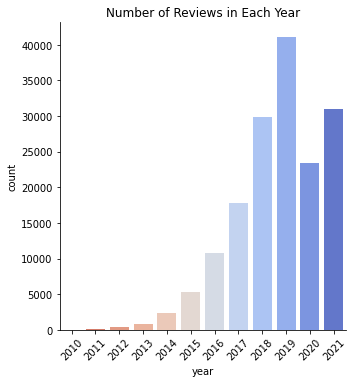

In [ ]:
sns.catplot(x='year', data=reviews, kind='count', palette='coolwarm_r')
plt.xticks(rotation=45)
plt.title("Number of Reviews in Each Year")
plt.show();

**How many comments were posted each month in 2019 and 2020?**  
Below is a visualization of the distribution of the number of comments posted in 2019 and 2020. We can see that September, October and December usually have the most comments posted.

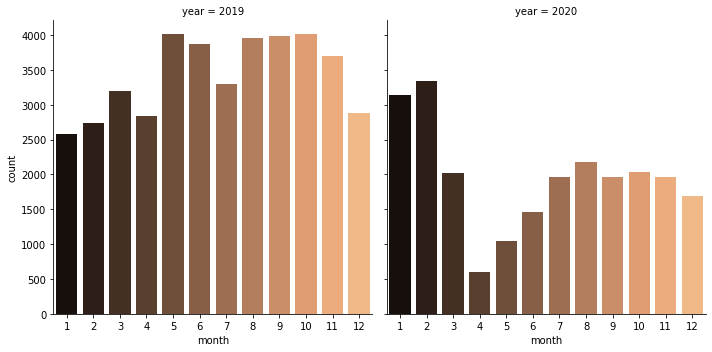

In [ ]:
reviews19_20 = reviews[(reviews['year']==2019) | (reviews['year']==2020)]
sns.catplot(x='month', data=reviews19_20, kind='count', col='year', palette='copper')
plt.show();

# Machine Learning Models

## Classification

In this model, we will predict whether a host is a superhost based on the available features in the dataset.

In [ ]:
# make a copy of the dataframe
modeldf = listings.copy()

In [ ]:
# fill any na values with 0
modeldf.is_superhost_numeric = modeldf.is_superhost_numeric.fillna(0)

We can start by dropping columns that we think will not have any predictive power, or are duplicates of other converted columns. 
* There are a number of columns that are URL string, for example, listing_url and picture_url, both of which would not have contributed to the model. 
* A few of the columns, including host_response_rate and host_acceptance_rate have a very large number of missing values, and we do not feel that we had enough information available to impute the missing values accuratly.

In [ ]:
model_cols = modeldf.drop(columns=['id','listing_url','last_scraped','name','description','neighborhood_overview','picture_url','host_url','host_name','host_since','host_location','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','neighbourhood','neighbourhood_cleansed','property_type','bathrooms_text','amenities','first_review','last_review','price','host_identity_verified','host_has_profile_pic','host_is_superhost','host_response_rate','host_acceptance_rate','host_listings_count', 'host_identity_verified_numeric'], axis=1)

df_listing_dummied = pd.get_dummies(model_cols, columns=['host_response_time','neighbourhood_group_cleansed','room_type','has_availability','instant_bookable'], drop_first=True)

* Few of the columns, including host_neighbourhood, neighbourhood and neighbourhood_cleansed, have a lot of different values which would result in a lot of additional columns when creating dummy variables, and these columns also contain messy string data.
* There are also some datetime columns, including first_review and last_review. We chose to drop these since there are a very large number of unique values in these columns, and we don't believe that they have any predictive power.

#### **Feature Engineering and Model Building** 

There are many columns that are sepcific to a listing, but not global to a host. Here we will convert a number of columns to be an aggregation per host. 

For example, we will find the *average_availability_30* across all of the listings for each host so that we have one value for each host.

When aggregating, we chose to take the sum of some values, and the mean of others. We chose to calculate the mean for the availability related columns in order to find the average availability for each host across all their listings. 

For the review score features, we took the average because we felt that summing the score would not make sense in the context. We took the sum of the reviews since we felt it would make sense to calculate a total number of reviews per host.

In [ ]:
# convert average_availability_30
average_availability_30_per_host = df_listing_dummied.groupby('host_id')['availability_30'].mean()
average_availability_30_per_host = pd.DataFrame(average_availability_30_per_host)
average_availability_30_per_host = average_availability_30_per_host.reset_index()
average_availability_30_per_host = average_availability_30_per_host.rename(columns={"availability_30": "average_availability_30_per_host"})

df_listing_dummied = df_listing_dummied.merge(average_availability_30_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='availability_30', axis=1)

In [ ]:
# convert average_availability_60
average_availability_60_per_host = df_listing_dummied.groupby('host_id')['availability_60'].mean()
average_availability_60_per_host = pd.DataFrame(average_availability_60_per_host)
average_availability_60_per_host = average_availability_60_per_host.reset_index()
average_availability_60_per_host = average_availability_60_per_host.rename(columns={"availability_60": "average_availability_60_per_host"})

df_listing_dummied = df_listing_dummied.merge(average_availability_60_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='availability_60', axis=1)

In [ ]:
# convert average_availability_90
average_availability_90_per_host = df_listing_dummied.groupby('host_id')['availability_90'].mean()
average_availability_90_per_host = pd.DataFrame(average_availability_90_per_host)
average_availability_90_per_host = average_availability_90_per_host.reset_index()
average_availability_90_per_host = average_availability_90_per_host.rename(columns={"availability_90": "average_availability_90_per_host"})

df_listing_dummied = df_listing_dummied.merge(average_availability_90_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='availability_90', axis=1)

In [ ]:
# convert average_availability_365
average_availability_365_per_host = df_listing_dummied.groupby('host_id')['availability_365'].mean()
average_availability_365_per_host = pd.DataFrame(average_availability_365_per_host)
average_availability_365_per_host = average_availability_365_per_host.reset_index()
average_availability_365_per_host = average_availability_365_per_host.rename(columns={"availability_365": "average_availability_365_per_host"})

df_listing_dummied = df_listing_dummied.merge(average_availability_365_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='availability_365', axis=1)

In [ ]:
# convert number of reviews
total_number_of_reviews_per_host = df_listing_dummied.groupby('host_id')['number_of_reviews'].sum()
total_number_of_reviews_per_host = pd.DataFrame(total_number_of_reviews_per_host)
total_number_of_reviews_per_host = total_number_of_reviews_per_host.reset_index()
total_number_of_reviews_per_host = total_number_of_reviews_per_host.rename(columns={"number_of_reviews": "total_number_of_reviews_per_host"})

df_listing_dummied = df_listing_dummied.merge(total_number_of_reviews_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='number_of_reviews', axis=1)

In [ ]:
# convert number of reviews_ltm
total_number_of_reviews_ltm_per_host = df_listing_dummied.groupby('host_id')['number_of_reviews_ltm'].sum()
total_number_of_reviews_ltm_per_host = pd.DataFrame(total_number_of_reviews_ltm_per_host)
total_number_of_reviews_ltm_per_host = total_number_of_reviews_ltm_per_host.reset_index()
total_number_of_reviews_ltm_per_host = total_number_of_reviews_ltm_per_host.rename(columns={"number_of_reviews_ltm": "total_number_of_reviews_ltm_per_host"})

df_listing_dummied = df_listing_dummied.merge(total_number_of_reviews_ltm_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='number_of_reviews_ltm', axis=1)

In [ ]:
# convert number_of_reviews_l30d 
total_number_of_reviews_l30d_per_host = df_listing_dummied.groupby('host_id')['number_of_reviews_l30d'].sum()
total_number_of_reviews_l30d_per_host = pd.DataFrame(total_number_of_reviews_l30d_per_host)
total_number_of_reviews_l30d_per_host = total_number_of_reviews_l30d_per_host.reset_index()
total_number_of_reviews_l30d_per_host = total_number_of_reviews_l30d_per_host.rename(columns={"number_of_reviews_l30d": "total_number_of_reviews_l30d_per_host"})

df_listing_dummied = df_listing_dummied.merge(total_number_of_reviews_l30d_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='number_of_reviews_l30d', axis=1)

In [ ]:
# convert review_scores_rating
avg_review_scores_rating_per_host = df_listing_dummied.groupby('host_id')['review_scores_rating'].mean()
avg_review_scores_rating_per_host = pd.DataFrame(avg_review_scores_rating_per_host)
avg_review_scores_rating_per_host = avg_review_scores_rating_per_host.reset_index()
avg_review_scores_rating_per_host = avg_review_scores_rating_per_host.rename(columns={"review_scores_rating": "avg_review_scores_rating_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_rating_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_rating', axis=1)

In [ ]:
# convert review_scores_accuracy
avg_review_scores_accuracy_per_host = df_listing_dummied.groupby('host_id')['review_scores_accuracy'].mean()
avg_review_scores_accuracy_per_host = pd.DataFrame(avg_review_scores_accuracy_per_host)
avg_review_scores_accuracy_per_host = avg_review_scores_accuracy_per_host.reset_index()
avg_review_scores_accuracy_per_host = avg_review_scores_accuracy_per_host.rename(columns={"review_scores_accuracy": "avg_review_scores_accuracy_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_accuracy_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_accuracy', axis=1)

In [ ]:
# convert review_scores_cleanliness
avg_review_scores_cleanliness_per_host = df_listing_dummied.groupby('host_id')['review_scores_cleanliness'].mean()
avg_review_scores_cleanliness_per_host = pd.DataFrame(avg_review_scores_cleanliness_per_host)
avg_review_scores_cleanliness_per_host = avg_review_scores_cleanliness_per_host.reset_index()
avg_review_scores_cleanliness_per_host = avg_review_scores_cleanliness_per_host.rename(columns={"review_scores_cleanliness": "avg_review_scores_cleanliness_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_cleanliness_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_cleanliness', axis=1)

In [ ]:
# convert review_scores_checkin
avg_review_scores_checkin_per_host = df_listing_dummied.groupby('host_id')['review_scores_checkin'].mean()
avg_review_scores_checkin_per_host = pd.DataFrame(avg_review_scores_checkin_per_host)

avg_review_scores_checkin_per_host = avg_review_scores_checkin_per_host.reset_index()

avg_review_scores_checkin_per_host = avg_review_scores_checkin_per_host.rename(columns={"review_scores_checkin": "avg_review_scores_checkin_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_checkin_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_checkin', axis=1)

In [ ]:
# convert review_scores_communication
avg_review_scores_communication_per_host = df_listing_dummied.groupby('host_id')['review_scores_communication'].mean()
avg_review_scores_communication_per_host = pd.DataFrame(avg_review_scores_communication_per_host)
avg_review_scores_communication_per_host = avg_review_scores_communication_per_host.reset_index()
avg_review_scores_communication_per_host = avg_review_scores_communication_per_host.rename(columns={"review_scores_communication": "avg_review_scores_checkin_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_communication_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_communication', axis=1)

In [ ]:
# convert review_scores_location
avg_review_scores_location_per_host = df_listing_dummied.groupby('host_id')['review_scores_location'].mean()
avg_review_scores_location_per_host = pd.DataFrame(avg_review_scores_location_per_host)
avg_review_scores_location_per_host = avg_review_scores_location_per_host.reset_index()
avg_review_scores_location_per_host = avg_review_scores_location_per_host.rename(columns={"review_scores_location": "avg_review_scores_location_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_location_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_location', axis=1)

In [ ]:
# convert review_scores_value 
avg_review_scores_value_per_host = df_listing_dummied.groupby('host_id')['review_scores_value'].mean()
avg_review_scores_value_per_host = pd.DataFrame(avg_review_scores_value_per_host)
avg_review_scores_value_per_host = avg_review_scores_value_per_host.reset_index()
avg_review_scores_value_per_host = avg_review_scores_value_per_host.rename(columns={"review_scores_value": "avg_review_scores_value_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_review_scores_value_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='review_scores_value', axis=1)

In [ ]:
# convert reviews_per_month
avg_reviews_per_month_per_host = df_listing_dummied.groupby('host_id')['reviews_per_month'].mean()
avg_reviews_per_month_per_host = pd.DataFrame(avg_reviews_per_month_per_host)
avg_reviews_per_month_per_host = avg_reviews_per_month_per_host.reset_index()
avg_reviews_per_month_per_host = avg_reviews_per_month_per_host.rename(columns={"reviews_per_month": "avg_reviews_per_month_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_reviews_per_month_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='reviews_per_month', axis=1)

In [ ]:
# convert room_type_Private room
avg_room_type_Private_room_per_host = df_listing_dummied.groupby('host_id')['room_type_Private room'].mean()
avg_room_type_Private_room_per_host = pd.DataFrame(avg_room_type_Private_room_per_host)
avg_room_type_Private_room_per_host = avg_room_type_Private_room_per_host.reset_index()
avg_room_type_Private_room_per_host = avg_room_type_Private_room_per_host.rename(columns={"room_type_Private room": "avg_room_type_Private_room_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_room_type_Private_room_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='room_type_Private room', axis=1)

In [ ]:
# convert room_type_Shared room
avg_room_type_Shared_room_per_host = df_listing_dummied.groupby('host_id')['room_type_Shared room'].mean()
avg_room_type_Shared_room_per_host = pd.DataFrame(avg_room_type_Shared_room_per_host)
avg_room_type_Shared_room_per_host = avg_room_type_Shared_room_per_host.reset_index()
avg_room_type_Shared_room_per_host = avg_room_type_Shared_room_per_host.rename(columns={"room_type_Shared room": "avg_room_type_Shared_room_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_room_type_Shared_room_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='room_type_Shared room', axis=1)

In [ ]:
# convert instant_bookable_t
avg_instant_bookable_t_per_host = df_listing_dummied.groupby('host_id')['instant_bookable_t'].mean()
avg_instant_bookable_t_per_host = pd.DataFrame(avg_instant_bookable_t_per_host)
avg_instant_bookable_t_per_host = avg_instant_bookable_t_per_host.reset_index()
avg_instant_bookable_t_per_host = avg_instant_bookable_t_per_host.rename(columns={"instant_bookable_t": "avg_instant_bookable_t_per_host"})

df_listing_dummied = df_listing_dummied.merge(avg_instant_bookable_t_per_host, on='host_id')

df_listing_dummied = df_listing_dummied.drop(columns='instant_bookable_t', axis=1)

In [ ]:
# convert from object type to category to prepare for model creation
df_listing_dummied.is_superhost_numeric = df_listing_dummied.is_superhost_numeric.astype('category')
# df_listing_dummied.host_identity_verified_numeric = df_listing_dummied.host_identity_verified_numeric.astype('category')

In [ ]:
# eliminate duplicate host_id
column_name = ['host_id']
hosts_model_df = df_listing_dummied.sort_values('host_id').drop_duplicates(subset=column_name)

#### **Creating a KNN model**

In the first model, we chose to use all of the available features. We calculated a low sensativity score, revealing that this model is not good at differentiating between superhost and non-superhost. 

After running Random Forest Classifier to find the most important features. The second model can be created with only the top few features and  much higher sensativity score can be calculated.

##### **Splitting the data**

In [ ]:
# features matrix
X = hosts_model_df.drop('is_superhost_numeric', axis=1)  
# target vector
y = hosts_model_df['is_superhost_numeric']

# split the data into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)
y_model = knn.predict(Xtest)
P = sum(ytest == 1)   # number who superhosts
n_test = len(ytest)    # total number of hosts in the dataset
TP = sum((ytest == 1) & (y_model == 1))    # the number that we correcty predicted as superhosts

TPR = TP/P   # sensitivity

In [ ]:
TPR  # True Positive Rate

0.5486381322957199

In [ ]:
# the total number in the dataset that are not super hosts
N = sum(ytest == 0)
# true negative, or the number that we correctly identified as not super hosts
TN = sum((ytest == 0) & (y_model == 0))
# the true negative rate (Specificity)
TNR = TN/N
# a false positive (the total positives - the correclty predicted positives = the falsly predicted postives)
FP = P-TP
FP
# a false negative (the total negatives - the correclty predicted negatives = the falsly predicted negatives)
FN = N-TN
FN

137

In [ ]:
# Calculate an overal accuracy score
accuracy_score(ytest, y_model)

0.5545774647887324

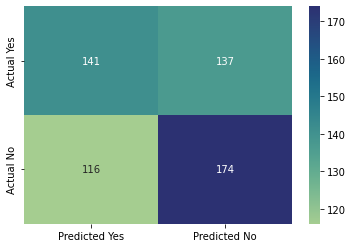

In [ ]:
data=[[TP, FN], [FP, TN]]
heatmap_data = pd.DataFrame(data)
heatmap_data.columns = ['Predicted Yes', 'Predicted No']
heatmap_data.index = ['Actual Yes', 'Actual No']
sns.heatmap(heatmap_data, annot=True, cmap="crest", fmt='d')

The confusion matrix below displays the true positive, true negative, false negative, and false poitive rates that resulted from running the model with all of the features. There were a large number of false positive where we predicted that a host was a superhost when they were actually not. For this reason, we chose to run a Random Forest Classifier to determine the most important features required for the classification model.

### **Feature Importance and Parameter tuning** 

The Random Forest Classifier reveals that the most important features are review related. For example, the total number of reviews that a host has in the last 12 months is the most important feature. The average number of reviews per month, as well as their cleanliness, their review score, and accuracy scores are also important. According to AirBnb ([AirBnb Superhost Requirements](https://www.airbnb.com/help/article/829/how-do-i-become-a-superhost)), a Superhost should have at least a 4.8 overall rating over the last year, and our Random Forest output reiterates this point. There is also a requirement to have at least 10 reservations in the last year. The results below are aligned with AirBnb's policies which states that  the number of reviews and quality of reviews are very important in determining if a host becomes a superhost. 

This analysis also reveals how important it is for AirBnb hosts to maintain glowing reviews since AirBnb will take this into account when selecting hosts to become Superhosts. Also, it is important for a host to receive a large number of reviews, and to have at least 10 reservations within the last year.

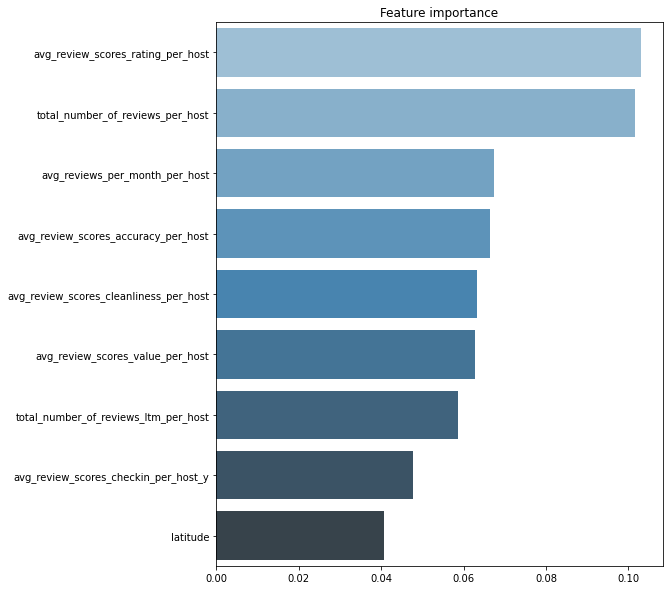

In [ ]:
# determining the most important features using RandomForestClassifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

# Drop redundant columns (for features with two unique values)
drop = ['is_superhost_numeric']
x, y = hosts_model_df.drop(drop,axis=1), hosts_model_df['is_superhost_numeric']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(8,10))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index[:9], x=imp.values[:9], palette="Blues_d", orient='h')

In [ ]:
host_count = pd.DataFrame(hosts[hosts.is_superhost_numeric == 1].groupby('neighbourhood_group_cleansed')['host_id'].count()).reset_index()
host_count.columns = ['neighborhood','count']

In [ ]:
# subset the df for only the most important features
model_2_df = hosts_model_df[['is_superhost_numeric','total_number_of_reviews_ltm_per_host','avg_reviews_per_month_per_host','total_number_of_reviews_per_host','avg_review_scores_rating_per_host', 'host_response_time_within an hour','avg_review_scores_cleanliness_per_host','avg_review_scores_accuracy_per_host']]

In [ ]:
# features matrix
X = model_2_df.drop('is_superhost_numeric', axis=1)  
# target vector
y = model_2_df['is_superhost_numeric']

# split the data into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)
y_model = knn.predict(Xtest)
# number who are superhosts
P = sum(ytest == 1)
# total number of hosts in the dataset
n_test = len(ytest)
# the number that we correcty predicted as superhosts
TP = sum((ytest == 1) & (y_model == 1))
# sensativity
TPR = TP/P

In [ ]:
# an improved sensitivity score of 62.96%
TPR

0.6147859922178989

In [ ]:
accuracy_score(ytest, y_model)

0.6197183098591549

In [ ]:
# the total number in the dataset that are not super hosts
N = sum(ytest == 0)
# true negative, or the number that we correctly identified as not super hosts
TN = sum((ytest == 0) & (y_model == 0))
# the true negative rate (Specificity)
TNR = TN/N
# a false positive (the total positives - the correclty predicted positives = the falsly predicted postives)
FP = P-TP
FP
# a false negative (the total negatives - the correclty predicted negatives = the falsly predicted negatives)
FN = N-TN
FN

117

#### **Model Results**

By selecting only the first few most important features, we were able to improve our model. We are now able to achieve a much higher sensativity score. There were a total of 158 hosts that we correctly predicted as superhosts. The confusion matrix below displays the true positive, true negative, false negative, and false poitive rates that resulted from running the model with all of the features. The matrix displays a much lower number of false positives compared to the previous model.

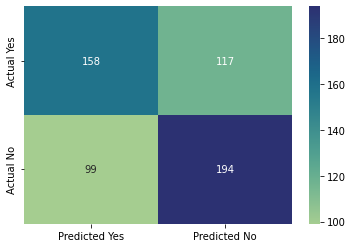

In [ ]:
# create a heatmap showing the results
data=[[TP, FN], [FP, TN]]
heatmap_data = pd.DataFrame(data)
heatmap_data.columns = ['Predicted Yes', 'Predicted No']
heatmap_data.index = ['Actual Yes', 'Actual No']
sns.heatmap(heatmap_data, annot=True, cmap="crest", fmt='d')

# Conclusion

We noticied that there is higher competition for Airbnb hosts in Santa Clara, and that the most expensive neighborhoods (Saratoga and Palo Alto) are located near downtown. Also, there are a large number of entire home/apartment type listings in Saratoga which indicates that hosts in Saratoga might percieve Airbnb listings as a business opportunity, viz-av-z hosts in Saratoga, who would be looking to save rent/money by renting out private rooms.

COVID-19 impacted the price of listings which reduced after the onset of the pandemic. The nunber of reviews also decreased as a result of the pandemic. 

The number of reviews plays a significant role in determining the prediction of host types, but is not significant in predicting price of listings. However, features related to accommodation, room type and neighborhoods in Palo Alto, Sacramento play an important role in determining future price of the listings. These features would be crucial for AirBnb to predict revenue.


### **Observations**

* Adjustment of listing prices based on the availability of competing listings within the neighborhood, especially during special circumstances such as COVID-19 
* We observe a trend of higher listing prices for superhosts, which provides prospective hosts with a great incentive to aim for becoming superhosts
* Airbnb hosts can place more emphasis in finding guests who are opinion leaders and bloggers who can leave positive reviews and increase exposure of the listing 

### **Referrences**
- Missingno -https://stackoverflow.com/questions/39644866/python-best-way-convey-missing-value-count/39645233#39645233

- Min Arg https://stackoverflow.com/questions/27114738/min-arg-is-an-empty-sequence

- Model referrence - https://www.kaggle.com/aybukehamideak/booking-prediction-ml-hyperparameter-optimization

- EDA Referrence- https://www.kaggle.com/avi111297/complete-eda-pred-cancel-of-booking-94-21-acc

- Superhost Requirements - https://www.airbnb.co.in/help/article/829/how-to-become-a-superhost